## LINEAR CORRELATION AND REGRESSION

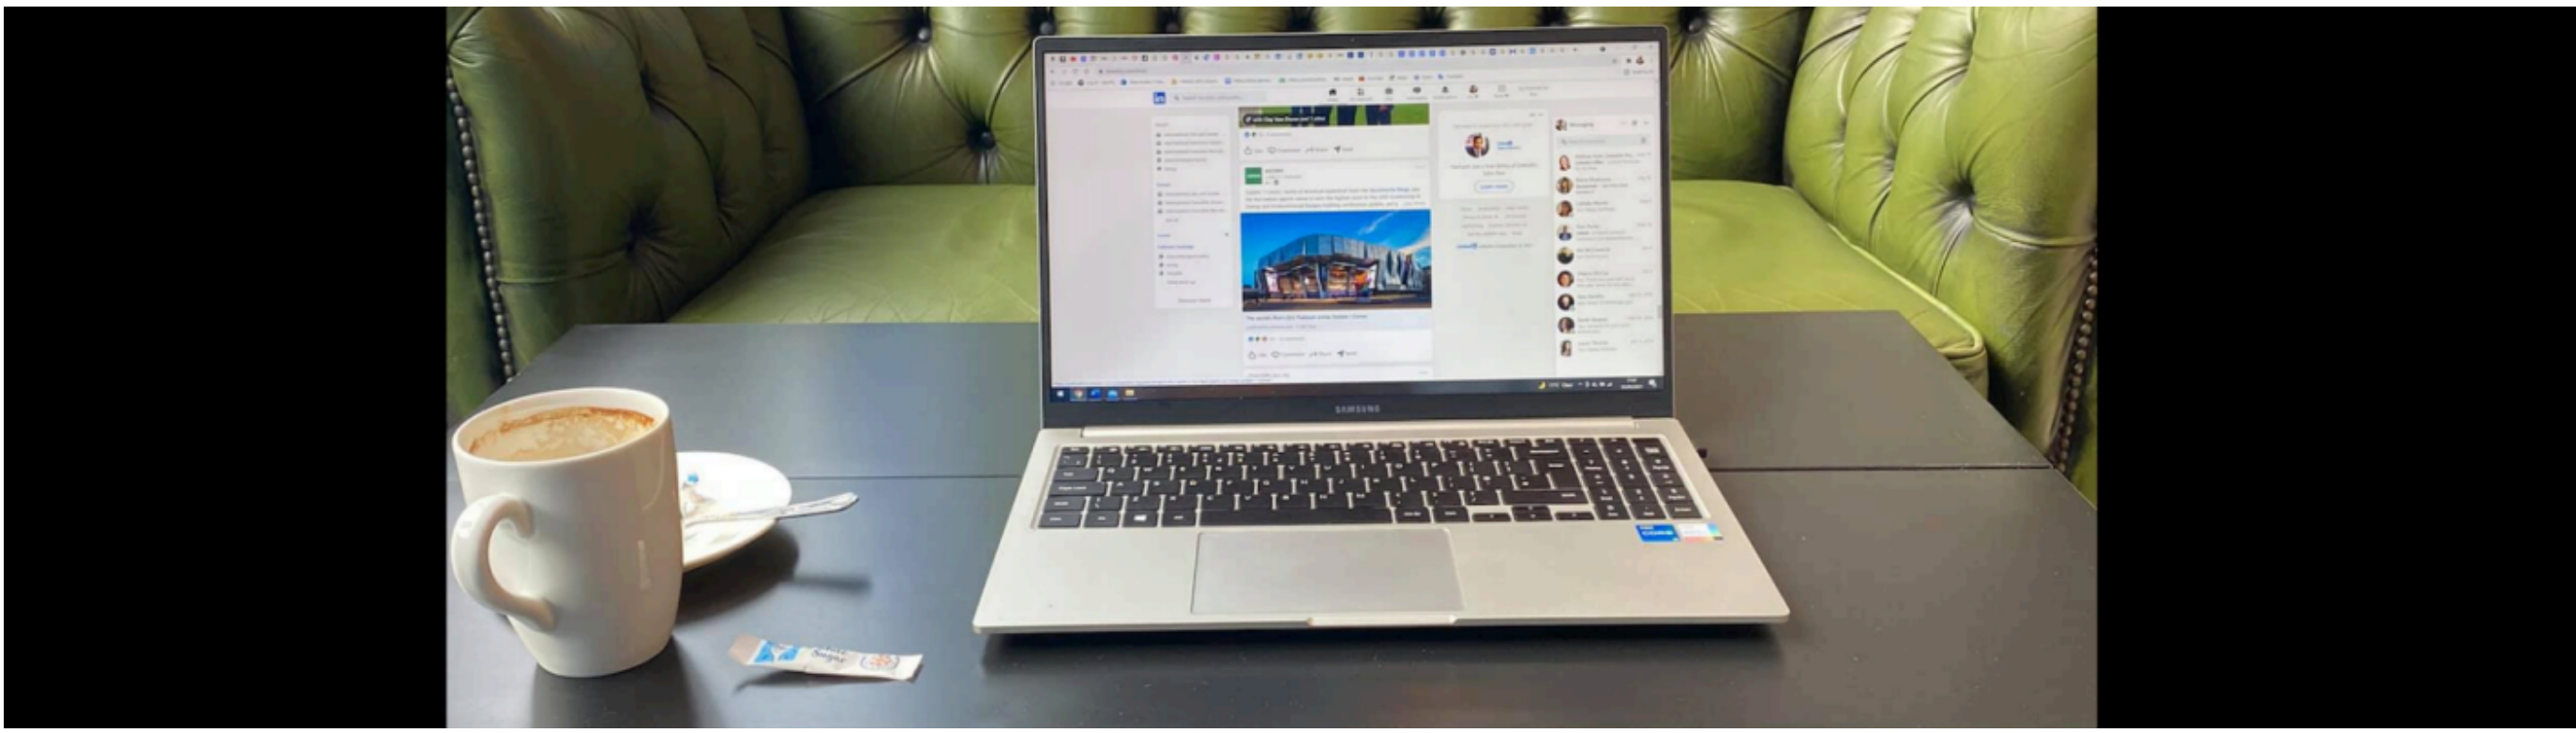

### HEMANT THAPA

In [180]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as st

## CORRELATION 

#### The degree to which the score on two Variables co-related, that is extend to which a varitaion in the scores on one variable result in a corresponding variations in the scores on the second variable. 

## Y = mX + C

Y is the dependent variable (the one we want to predict or understand),

X is the independent variable (the one we use to predict or explain Y),

m is the slope or gradient of the line, and

C is the y-intercept, which is the value of Y when X is 0.

The value of m quantifies the change in Y for a unit change in X. If m is positive, it means that as X increases, Y also increases. If m is negative, it means that as X increases, Y decreases. The magnitude of m reflects the strength of the relationship between X and Y. The larger the absolute value of m, the stronger the correlation.

The value of C represents the point at which the line intersects the Y-axis when X is 0. It gives the initial value of Y before any changes in X occur.

When the correlation between two variables is strong, changes in the scores of one variable tend to correspond with corresponding changes in the scores of the other variable. A correlation coefficient is used to measure the strength and direction of the correlation quantitatively. It can take values between -1 and +1, where:

1. A correlation coefficient of +1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases in a linear fashion.

2. A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases in a linear fashion.

3. A correlation coefficient of 0 indicates no linear relationship between the variables, meaning that changes in one variable do not correspond to any changes in the other variable.

In [2]:
dataset = {"student":[x for x in range(1,11)],
           "study time":[40, 43, 18, 10, 25, 33, 27, 17, 30, 47],
           "Examination Mark":[58, 73, 56, 47, 58, 54, 45, 32, 68, 69]}

In [3]:
dataset

{'student': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'study time': [40, 43, 18, 10, 25, 33, 27, 17, 30, 47],
 'Examination Mark': [58, 73, 56, 47, 58, 54, 45, 32, 68, 69]}

In [4]:
df = pd.DataFrame(dataset)

In [5]:
df

,student,study time,Examination Mark
0,1,40,58
1,2,43,73
2,3,18,56
3,4,10,47
4,5,25,58
5,6,33,54
6,7,27,45
7,8,17,32
8,9,30,68
9,10,47,69


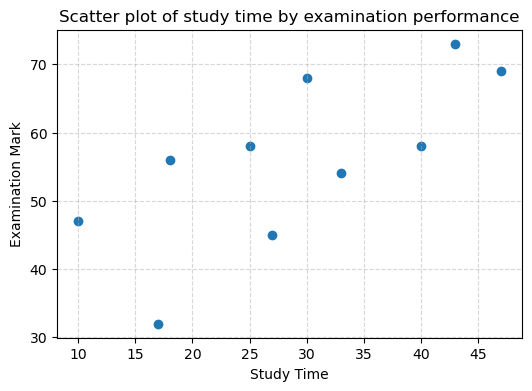

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(df['study time'], df['Examination Mark'])
plt.xlabel("Study Time")
plt.ylabel("Examination Mark")
plt.title("Scatter plot of study time by examination performance")
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

## PEARSON r CORRELATION COEFFICIENT 

In [7]:
average_study_time = df['study time'].mean()
print(average_study_time)

29.0


In [8]:
std_study_time = [(x - average_study_time)**2/10 for x in df['study time']]

In [9]:
sum(std_study_time)

130.4

In [10]:
average_examination_mark = df['Examination Mark'].mean()
print(average_examination_mark)

56.0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler

StandardScaler()

In [13]:
df['Study time Z score'] = scaler.fit_transform(df['study time'].values.reshape(-1,1))

In [14]:
df['Examination Z score'] = scaler.fit_transform(df['Examination Mark'].values.reshape(-1,1))

In [15]:
df['Product of Z scores'] = df['Study time Z score'] * df['Examination Z score']

In [16]:
df

,student,study time,Examination Mark,Study time Z score,Examination Z score,Product of Z scores
0,1,40,58,0.963283,0.169516,0.163292
1,2,43,73,1.225997,1.440885,1.766520
2,3,18,56,-0.963283,0.000000,-0.000000
3,4,10,47,-1.663852,-0.762821,1.269222
4,5,25,58,-0.350285,0.169516,-0.059379
5,6,33,54,0.350285,-0.169516,-0.059379
6,7,27,45,-0.175142,-0.932337,0.163292
7,8,17,32,-1.050854,-2.034191,2.137638
8,9,30,68,0.087571,1.017095,0.089068
9,10,47,69,1.576281,1.101853,1.736831


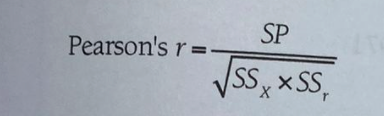

In [17]:
pearson_correaltion_coefficient = sum(df['Product of Z scores'])/len(df['Product of Z scores'])

In [18]:
pearson_correaltion_coefficient

0.7207104456511156

#### In our example r = 0.72, which is a high positive correlation as it much closer to 1 than 0

## A CONVENIENT WAY TO WORK OUT ( r )

In [19]:
datasetTwo = {"student":[x for x in range(1,11)],
           "study time - X":[40, 43, 18, 10, 25, 33, 27, 17, 30, 47],
           "Examination Mark - Y":[58, 73, 56, 47, 58, 54, 45, 32, 68, 69]}

In [20]:
df2 = pd.DataFrame(datasetTwo)

In [21]:
df2['X Square'] = df2['study time - X']**2

In [22]:
df2['Y Square'] = df2['Examination Mark - Y']**2

In [23]:
df2['XY'] = df2['study time - X'] * df2['Examination Mark - Y']

In [24]:
df2

,student,study time - X,Examination Mark - Y,X Square,Y Square,XY
0,1,40,58,1600,3364,2320
1,2,43,73,1849,5329,3139
2,3,18,56,324,3136,1008
3,4,10,47,100,2209,470
4,5,25,58,625,3364,1450
5,6,33,54,1089,2916,1782
6,7,27,45,729,2025,1215
7,8,17,32,289,1024,544
8,9,30,68,900,4624,2040
9,10,47,69,2209,4761,3243


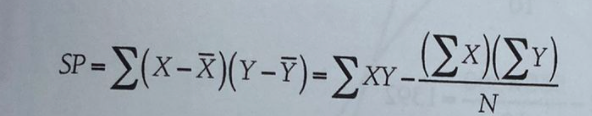

In [25]:
sum_of_product = sum(df2['XY'])-((sum(df2['study time - X']))*(sum(df2['Examination Mark - Y']))/len(df2['XY']))

In [26]:
sum_of_product

971.0

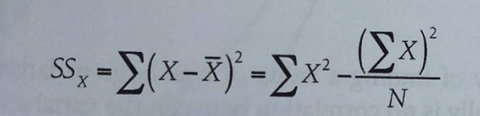

In [27]:
sum_of_square_first_variable = sum(df2['X Square']) - (sum(df2['study time - X'])**2/len(df2['study time - X']))

In [28]:
sum_of_square_first_variable

1304.0

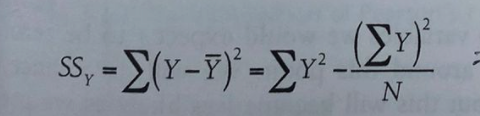

In [29]:
sum_of_square_second_variable = sum(df2['Y Square']) - (sum(df2['Examination Mark - Y'])**2/
                                                        len(df2['Examination Mark - Y']))

In [30]:
sum_of_square_second_variable

1392.0

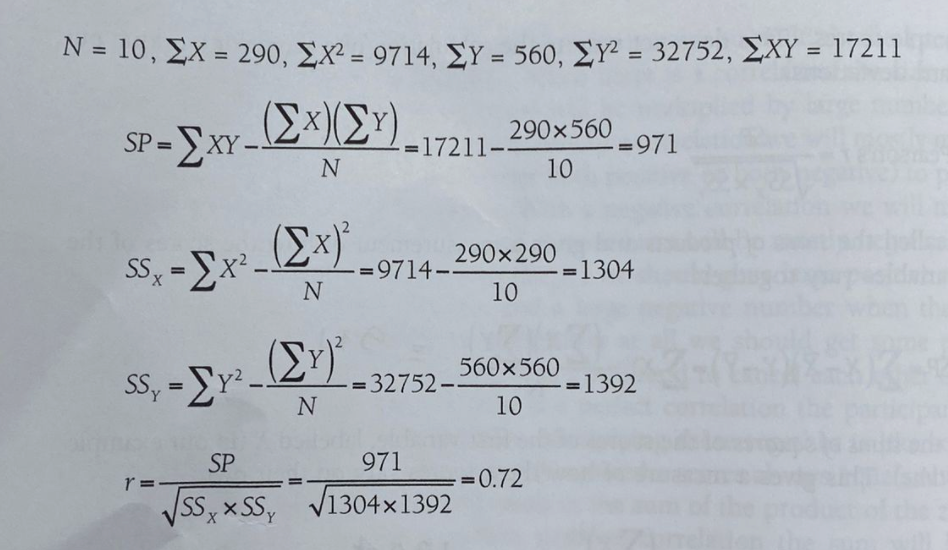

In [31]:
pearsons = sum_of_product/ math.sqrt(sum_of_square_first_variable * sum_of_square_second_variable)

In [32]:
pearsons

0.7207104456511156

In [163]:
b = sum_of_product / sum_of_square_first_variable
print(f'Gradient: {b}')

Gradient: 0.7446319018404908


In [168]:
a = df['Examination Mark'].mean() - b*df['study time'].mean()

In [170]:
print(f'Intercept: {a}')

Intercept: 34.40567484662577


## LINE MODEL

In [121]:
df

,student,study time,Examination Mark,Study time Z score,Examination Z score,Product of Z scores
0,1,40,58,0.963283,0.169516,0.163292
1,2,43,73,1.225997,1.440885,1.766520
2,3,18,56,-0.963283,0.000000,-0.000000
3,4,10,47,-1.663852,-0.762821,1.269222
4,5,25,58,-0.350285,0.169516,-0.059379
5,6,33,54,0.350285,-0.169516,-0.059379
6,7,27,45,-0.175142,-0.932337,0.163292
7,8,17,32,-1.050854,-2.034191,2.137638
8,9,30,68,0.087571,1.017095,0.089068
9,10,47,69,1.576281,1.101853,1.736831


In [81]:
X = df['study time']

In [83]:
X = np.array(X).reshape(-1,1)

In [84]:
X

array([[40],
       [43],
       [18],
       [10],
       [25],
       [33],
       [27],
       [17],
       [30],
       [47]])

In [101]:
y = df['Examination Mark']

In [102]:
y = np.array(y)

In [103]:
y

array([58, 73, 56, 47, 58, 54, 45, 32, 68, 69])

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
Model = LinearRegression()

In [106]:
Model.fit(X,y)

LinearRegression()

In [107]:
r = Model.score(X, y)

In [108]:
r

0.5194235464706296

In [109]:
y_pred = Model.predict(X)

In [176]:
df['Predicted Exam Mark'] = y_pred

In [177]:
df

,student,study time,Examination Mark,Study time Z score,Examination Z score,Product of Z scores,Predicted Exam Mark
0,1,40,58,0.963283,0.169516,0.163292,64.190951
1,2,43,73,1.225997,1.440885,1.766520,66.424847
2,3,18,56,-0.963283,0.000000,-0.000000,47.809049
3,4,10,47,-1.663852,-0.762821,1.269222,41.851994
4,5,25,58,-0.350285,0.169516,-0.059379,53.021472
5,6,33,54,0.350285,-0.169516,-0.059379,58.978528
6,7,27,45,-0.175142,-0.932337,0.163292,54.510736
7,8,17,32,-1.050854,-2.034191,2.137638,47.064417
8,9,30,68,0.087571,1.017095,0.089068,56.744632
9,10,47,69,1.576281,1.101853,1.736831,69.403374


In [197]:
y_pred

array([64.19095092, 66.42484663, 47.80904908, 41.85199387, 53.02147239,
       58.97852761, 54.5107362 , 47.06441718, 56.7446319 , 69.40337423])

In [198]:
predict_42_hour = Model.predict(np.array([42]).reshape(-1,1))
predict_42_hour

array([65.68021472])

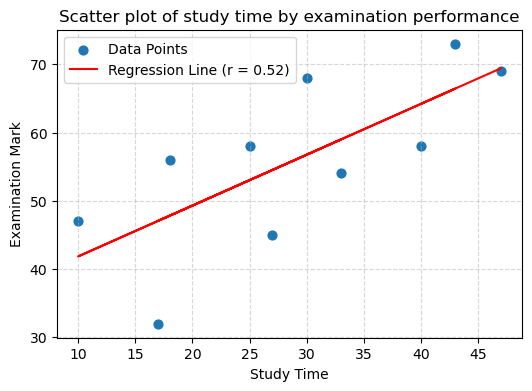

In [120]:
plt.figure(figsize=(6,4))
plt.scatter(df['study time'], df['Examination Mark'], s=40, label='Data Points')
plt.plot(X, y_pred, color="red", label=f'Regression Line (r = {r:.2f})')
plt.xlabel("Study Time")
plt.ylabel("Examination Mark")
plt.title("Scatter plot of study time by examination performance")
plt.grid(True, alpha=0.5, linestyle="--")
plt.legend()
plt.show()

In [126]:
pearsons

0.7207104456511156

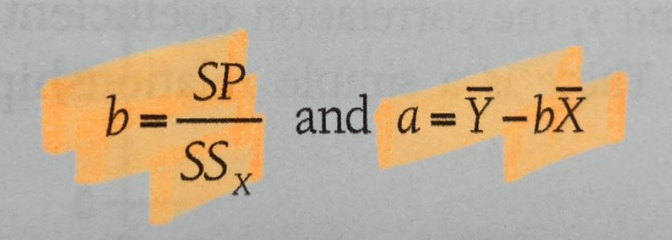

In [164]:
b = sum_of_product / sum_of_square_first_variable
print(f'Gradient: {b}')

Gradient: 0.7446319018404908


In [167]:
print(f'Sklearn Gradient: {Model.coef_[0]}')

Sklearn Gradient: 0.7446319018404908


In [171]:
print(f'Intercept: {a}')

Intercept: 34.40567484662577


In [174]:
print(f'Intercept: {Model.intercept_}')

Intercept: 34.40567484662577


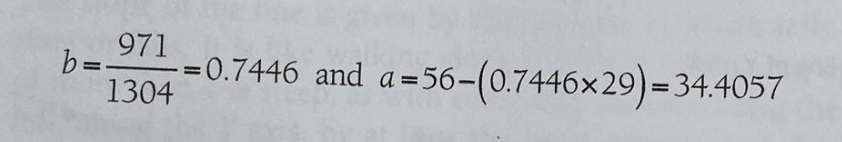

#### ALTERANTIVE WAY TO CALULATE SLOPE

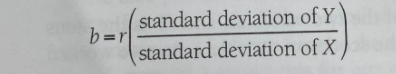

r and the slope of the regression line

In [179]:
pearsons

0.7207104456511156

In [182]:
std_x = st.stdev(df['study time'])
print(f"Standard devaition - x: {std_x}")

Standard devaition - x: 12.036980056845191


In [183]:
std_y = st.stdev(df['Examination Mark'])
print(f"Standard devaition - y: {std_y}")

Standard devaition - y: 12.436505404118419


In [185]:
slope_b = pearsons * (std_y/std_x)
print(f"Slope: {slope_b}")

Slope: 0.7446319018404908


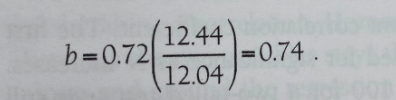

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
mse = mean_squared_error(y, y_pred)
print(mse)

66.89624233128835


In [199]:
r_square = r2_score(y,y_pred)
print(r_square)

0.5194235464706296


## REFRENCES:

GeeksforGeeks - "ML | Linear Regression": This article explains the concept of linear regression, its implementation, and the mathematical aspects involved. You can find it at the following link: https://www.geeksforgeeks.org/ml-linear-regression/

Analytics Vidhya - "Everything you need to know about Linear Regression": This comprehensive article covers the basics of linear regression, its assumptions, evaluation metrics, and various implementations. You can find it here: https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/

scikit-learn - "sklearn.linear_model.LinearRegression": This is the official documentation for the LinearRegression class in scikit-learn, a popular machine learning library in Python. The documentation provides detailed information about how to use the linear regression model in scikit-learn. You can find it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Statistics Solutions - "What is Linear Regression": This resource gives an overview of linear regression, explaining its purpose, assumptions, and interpretation of results. You can find it at the following link: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/

Spiceworks - "What is Linear Regression?": This article provides a simple explanation of linear regression and its applications, particularly in the context of artificial intelligence. You can find it here: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/
    